# Descripción del proyecto

La compañía móvil Megaline no está satisfecha al ver que muchos de sus clientes utilizan planes heredados. Quieren desarrollar un modelo que pueda analizar el comportamiento de los clientes y recomendar uno de los nuevos planes de Megaline: Smart o Ultra.

Tenemos acceso a los datos de comportamiento de los suscriptores que ya se han cambiado a los planes nuevos. 

Nota: los datos ya se encuentran preprocesados!

# Descripción de los datos

Los datos se encuentran en el archivo 'users_behavior.csv'.

Cada observación en el dataset contiene información del comportamiento mensual sobre un usuario. La información dada es la siguiente:

- сalls — número de llamadas,
- minutes — duración total de la llamada en minutos,
- messages — número de mensajes de texto,
- mb_used — Tráfico de Internet utilizado en MB,
- is_ultra — plan para el mes actual (Ultra - 1, Smart - 0).


In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve



In [5]:
#Cargamos el dataset
df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/users_behavior.csv')

# Estudiamos el dataset

In [6]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [8]:
df.isnull().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [9]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [6]:
df.duplicated().sum()

0

Podemos observar los datos ya preprocesados!! una tabla que contiene los datos del comportamiento mensual de un usuario con 3214 filas y 5 columnas en donde el tipo de datos es correcto no existen valores nulos ni duplicados

# Modelos de aprendizaje

## Dividir los datos en conjuntos de entrenamiento, validación y prueba:

In [7]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

# Dividir los datos en entrenamiento (60%), validación (20%) y prueba (20%)
features_train, features_temp, target_train, target_temp = train_test_split(features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_temp, target_temp, test_size=0.5, random_state=12345)

In [8]:
# Imprimir tamaños de los conjuntos resultantes
print("Tamaño del conjunto de entrenamiento:", len(features_train))
print("Tamaño del conjunto de validación:", len(features_valid))
print("Tamaño del conjunto de prueba:", len(features_test))

Tamaño del conjunto de entrenamiento: 1928
Tamaño del conjunto de validación: 643
Tamaño del conjunto de prueba: 643


### ARBOL DE DECISION

Aún no necesitamos probar nuestros modelos con el dataset de prueba. Primero seleccionaremos el mejor modelo.

In [9]:
for depth in range(1,6):
    model= DecisionTreeClassifier(random_state=12345,max_depth= depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    print('max_depth =', depth, ': ', end='')
    print(accuracy_score(target_valid,predictions_valid))

max_depth = 1 : 0.7542768273716952
max_depth = 2 : 0.7822706065318819
max_depth = 3 : 0.7853810264385692
max_depth = 4 : 0.7791601866251944
max_depth = 5 : 0.7791601866251944


el mejor modelo parece ser el de con profundidfad de 3!!!

In [10]:
# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=12345, max_depth=3)

model.fit(features_train, target_train)

DecisionTreeClassifier(max_depth=3, random_state=12345)

In [11]:
# Realizar predicciones en el conjunto de entrenamiento:
target_pred = model.predict(features_train)

In [12]:
# Evaluar el rendimiento del modelo:
print("Accuracy Score:", accuracy_score(target_train, target_pred))
print("\nClassification Report:")
print(classification_report(target_train, target_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(target_train, target_pred))

Accuracy Score: 0.8075726141078838

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      1335
           1       0.81      0.49      0.61       593

    accuracy                           0.81      1928
   macro avg       0.81      0.72      0.74      1928
weighted avg       0.81      0.81      0.79      1928


Confusion Matrix:
[[1267   68]
 [ 303  290]]


### BOSQUE ALEATORIO

In [14]:
# Crear el modelo de Bosque Aleatorio
modelo_dos = RandomForestClassifier(random_state=12345, n_estimators=100)

In [15]:
# Entrenar el modelo
modelo_dos.fit(features_train, target_train)

RandomForestClassifier(random_state=12345)

In [16]:
# Realizar predicciones en el conjunto de validación
predictions_valid_dos = modelo_dos.predict(features_valid)


In [17]:
#Evaluar el rendimiento del modelo
print("Accuracy Score:", accuracy_score(target_valid, predictions_valid_dos))
print("\nClassification Report:")
print(classification_report(target_valid, predictions_valid_dos))
print("\nConfusion Matrix:")
print(confusion_matrix(target_valid, predictions_valid_dos))

Accuracy Score: 0.7853810264385692

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       454
           1       0.68      0.51      0.58       189

    accuracy                           0.79       643
   macro avg       0.75      0.70      0.72       643
weighted avg       0.78      0.79      0.78       643


Confusion Matrix:
[[409  45]
 [ 93  96]]


### REGRESION LOGISTICA

In [19]:
# Crear el modelo de Regresión Logística
modelo_tres = LogisticRegression(random_state=12345,  solver= 'liblinear')

In [20]:
# Entrenar el modelo
modelo_tres.fit(features_train, target_train)


LogisticRegression(random_state=12345, solver='liblinear')

In [21]:
# Realizar predicciones en el conjunto de validación
predictions_valid_tres = modelo_tres.predict(features_valid)


In [22]:
# Evaluar el rendimiento del modelo
print("Accuracy Score:", accuracy_score(target_valid, predictions_valid_tres))
print("\nClassification Report:")
print(classification_report(target_valid, predictions_valid_tres))
print("\nConfusion Matrix:")
print(confusion_matrix(target_valid, predictions_valid_tres))

Accuracy Score: 0.7589424572317263

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.98      0.85       454
           1       0.83      0.23      0.36       189

    accuracy                           0.76       643
   macro avg       0.79      0.60      0.60       643
weighted avg       0.77      0.76      0.71       643


Confusion Matrix:
[[445   9]
 [146  43]]


## Gráficos de ROC y Curva de Precision-Recall:

### PRUEBA DE CORDURA

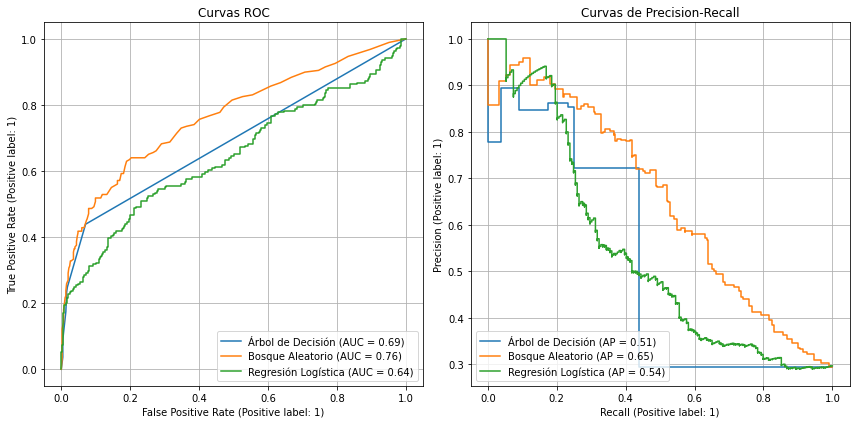

In [24]:
# Crear subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot ROC curve para cada modelo
plot_roc_curve(model, features_valid, target_valid, ax=ax1, name='Árbol de Decisión')
plot_roc_curve(modelo_dos, features_valid, target_valid, ax=ax1, name='Bosque Aleatorio')
plot_roc_curve(modelo_tres, features_valid, target_valid, ax=ax1, name='Regresión Logística')
ax1.set_title('Curvas ROC')
ax1.grid(True)

# Plot Precision-Recall curve para cada modelo
plot_precision_recall_curve(model, features_valid, target_valid, ax=ax2, name='Árbol de Decisión')
plot_precision_recall_curve(modelo_dos, features_valid, target_valid, ax=ax2, name='Bosque Aleatorio')
plot_precision_recall_curve(modelo_tres, features_valid, target_valid, ax=ax2, name='Regresión Logística')
ax2.set_title('Curvas de Precision-Recall')
ax2.grid(True)

# Mostrar las curvas
plt.tight_layout()
plt.show()

El primer gráfico muestra las curvas ROC para cada modelo, y el segundo muestra las curvas de Precision-Recall.

En ambas gráficas, cuanto más cerca estén las curvas del rincón superior izquierdo, mejor será el rendimiento del modelo. Una curva ROC que se eleve rápidamente hacia el rincón superior izquierdo y una curva Precision-Recall que esté cerca de 1 para un rango amplio de umbrales son indicativos de un buen modelo.

# Conclusiones

Los resultados obtenidos al evaluar los tres modelos de machine learning (Árbol de Decisión, Bosque Aleatorio y Regresión Logística) proporcionan una visión clara de su rendimiento en la tarea específica planteada.

La curva ROC y la curva de Precision-Recall son herramientas esenciales para esta evaluación. En términos de la **curva ROC, el Bosque Aleatorio** obtuvo el mejor rendimiento con un **AUC de 0.76**, seguido por el Árbol de Decisión con un AUC de 0.69, y por último la Regresión Logística con un AUC de 0.64. Esto indica que el Bosque Aleatorio es más eficaz en distinguir entre clases positivas y negativas.

Por otro lado, en la curva de **Precision-Recall, el Bosque Aleatorio** también demostró ser el modelo más robusto con un **AP de 0.65**, en comparación con el AP de 0.54 de la Regresión Logística y el AP de 0.51 del Árbol de Decisión. Estos resultados sugieren que el Bosque Aleatorio mantiene un equilibrio más favorable entre precisión y recall, lo que es crucial en situaciones donde la clase positiva es de particular interés.

En resumen, el **Bosque Aleatorio** se presenta como el modelo más adecuado para este conjunto de datos y problema específico, ofreciendo un balance superior en términos de precisión y capacidad de detección.